# Projecting Maternal Mortality Rate

Source of data:	PSA

Forecast method:	SES

In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np
import matplotlib.pyplot as plt
from tsa_utils import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-v9y1x1op because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
#df= pd.read_csv('dataset_demand_compiled_v1.csv')
df_maternal = pd.read_csv('~/cpt5/capstone/data/processed/2006-20_deaths_maternal v1.csv')

# Maternal

In [3]:
df_maternal.tail()

,Year,Region,Total
250,2006,REGION X (NORTHERN MINDANAO),88
251,2006,REGION XI (DAVAO REGION),82
252,2006,REGION XII (SOCCSKSARGEN),53
253,2006,REGION XIII (CARAGA),45
254,2006,BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANA...,6


In [4]:
df_maternal.columns = ['year', 'Region', 'maternal_count']

In [5]:
df_maternal.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006])

In [6]:
df_maternal['Region'].unique()

array(['NATIONAL CAPITAL REGION (NCR)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)',
       'REGION I (ILOCOS REGION)', 'REGION II (CAGAYAN VALLEY)',
       'REGION III (CENTRAL LUZON)', 'REGION IV-A (CALABARZON)',
       ' MIMAROPA REGION', 'REGION V (BICOL REGION)',
       'REGION VI (WESTERN VISAYAS)', 'REGION VII (CENTRAL VISAYAS)',
       'REGION VIII (EASTERN VISAYAS)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (CARAGA)',
       'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)'],
      dtype=object)

In [7]:
df_maternal['Region'].replace({
                 'NATIONAL CAPITAL REGION (NCR)': "NCR", 
                 'CORDILLERA ADMINISTRATIVE REGION (CAR)': 'CAR',
                 'REGION I (ILOCOS REGION)': "I - Ilocos",
                 'REGION II (CAGAYAN VALLEY)': "II - Cagayan",
                 'REGION III (CENTRAL LUZON)': "III - C. Luzon",
                 'REGION IV-A (CALABARZON)': "IVA - Calabarzon",
                 ' MIMAROPA REGION': "MIMAROPA",
                 'REGION V (BICOL REGION)': "V - Bicol",
                 'REGION VI (WESTERN VISAYAS)': "VI - W. Visayas",
                 'REGION VII (CENTRAL VISAYAS)': "VII - C. Visayas" ,
                 'REGION VIII (EASTERN VISAYAS)': "VIII - E. Visayas",
                 'REGION IX (ZAMBOANGA PENINSULA)': "IX - Zamboanga",
                 'REGION X (NORTHERN MINDANAO)': "X - N. Mindanao",
                 'REGION XI (DAVAO REGION)':"XI - Davao",
                 'REGION XII (SOCCSKSARGEN)':"XII - SOCCSKSARGEN",
                 'REGION XIII (CARAGA)': "XIII - Caraga",
                 'BANGSAMORO AUTONOMOUS REGION IN MUSLIM MINDANAO (BARMM)':
                                                            "BARMM"

                        }, inplace=True)


In [8]:
df_maternal['Region'].unique()

array(['NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN',
       'XIII - Caraga', 'BARMM'], dtype=object)

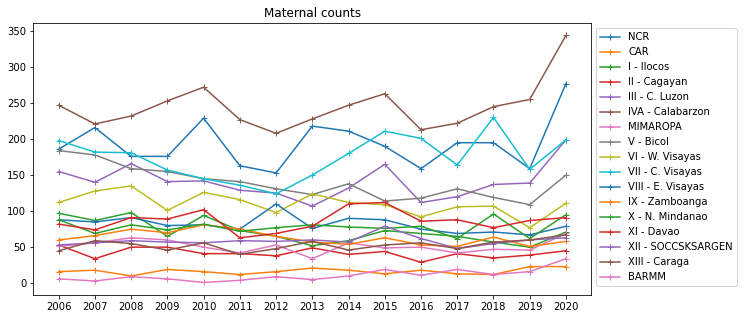

In [9]:
plt.figure(figsize=(10,5))
for i in df_maternal['Region'].unique():
    df = df_maternal[df_maternal['Region'] == i]
    plt.plot(df['year'], df['maternal_count'],'+-', label=i)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2006,2021))
plt.title('Maternal counts');

In [10]:
df_births = pd.read_excel('~/cpt5/capstone/data/processed/infant_births.xls')

In [11]:
for i in np.arange(2021,2031):
    df_births[i] = np.nan

In [12]:
df_births

,Region,Type,2019,2018,2017,2016,2015,2014,2013,2012,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,NATIONAL CAPITAL REGION (NCR),Infant births,242500,216871,217480,219936,231766,239736,243626,246994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CORDILLERA ADMINISTRATIVE REGION (CAR),Infant births,20727,29123,28297,29285,30873,32263,33329,34000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,REGION I (ILOCOS REGION),Infant births,76008,76899,79842,82206,85871,87883,89948,92180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,REGION II (CAGAYAN VALLEY),Infant births,53001,55635,56636,58490,60511,62320,63620,65222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REGION III (CENTRAL LUZON),Infant births,174603,190592,191394,191245,196217,196409,197294,204510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,REGION IV-A (CALABARZON),Infant births,216909,248297,248401,251344,260339,257461,260463,264571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MIMAROPA REGION,Infant births,40904,47150,47655,48888,50122,48170,48530,49606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,REGION V (BICOL REGION),Infant births,107423,109223,112512,116092,115210,115772,119727,120791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,REGION VI (WESTERN VISAYAS),Infant births,81531,104976,110367,114774,118788,119231,123987,126333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,REGION VII (CENTRAL VISAYAS),Infant births,89570,138656,144603,145550,148319,152542,150534,154872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
year = np.arange(2010,2031)

In [14]:
df_births = df_births.melt(id_vars='Region', value_vars=year)
df_births.columns= ['Region', 'year', 'live_births']

In [15]:
df_births

,Region,year,live_births
0,NATIONAL CAPITAL REGION (NCR),2010,259915.0
1,CORDILLERA ADMINISTRATIVE REGION (CAR),2010,33481.0
2,REGION I (ILOCOS REGION),2010,98214.0
3,REGION II (CAGAYAN VALLEY),2010,65273.0
4,REGION III (CENTRAL LUZON),2010,204572.0
...,...,...,...
352,REGION X (NORTHERN MINDANAO),2030,NaN
353,REGION XI (DAVAO REGION),2030,NaN
354,REGION XII (SOCCSKSARGEN),2030,NaN
355,REGION XIII (Caraga),2030,NaN


In [16]:
df_births.Region.unique()

array(['NATIONAL CAPITAL REGION (NCR)',
       'CORDILLERA ADMINISTRATIVE REGION (CAR)',
       'REGION I (ILOCOS REGION)', 'REGION II (CAGAYAN VALLEY)',
       'REGION III (CENTRAL LUZON)', 'REGION IV-A (CALABARZON)',
       ' MIMAROPA REGION', 'REGION V (BICOL REGION)',
       'REGION VI (WESTERN VISAYAS)', 'REGION VII (CENTRAL VISAYAS)',
       'REGION VIII (EASTERN VISAYAS)', 'REGION IX (ZAMBOANGA PENINSULA)',
       'REGION X (NORTHERN MINDANAO)', 'REGION XI (DAVAO REGION)',
       'REGION XII (SOCCSKSARGEN)', 'REGION XIII (Caraga)',
       'AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)'], dtype=object)

In [17]:
df_births['Region'].replace({
                 'NATIONAL CAPITAL REGION (NCR)': "NCR", 
                 'CORDILLERA ADMINISTRATIVE REGION (CAR)': 'CAR',
                 'REGION I (ILOCOS REGION)': "I - Ilocos",
                 'REGION II (CAGAYAN VALLEY)': "II - Cagayan",
                 'REGION III (CENTRAL LUZON)': "III - C. Luzon",
                 'REGION IV-A (CALABARZON)': "IVA - Calabarzon",
                 ' MIMAROPA REGION': "MIMAROPA",
                 'REGION V (BICOL REGION)': "V - Bicol",
                 'REGION VI (WESTERN VISAYAS)': "VI - W. Visayas",
                 'REGION VII (CENTRAL VISAYAS)': "VII - C. Visayas" ,
                 'REGION VIII (EASTERN VISAYAS)': "VIII - E. Visayas",
                 'REGION IX (ZAMBOANGA PENINSULA)': "IX - Zamboanga",
                 'REGION X (NORTHERN MINDANAO)': "X - N. Mindanao",
                 'REGION XI (DAVAO REGION)':"XI - Davao",
                 'REGION XII (SOCCSKSARGEN)':"XII - SOCCSKSARGEN",
                 'REGION XIII (Caraga)': "XIII - Caraga",
                 'AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM)':
                                                            "BARMM"

                        }, inplace=True)

In [18]:
df_maternal_rate = df_maternal.merge(df_births, on=['year', 'Region'], how='right')
df_maternal_rate

,year,Region,maternal_count,live_births
0,2010.0,NCR,229.0,259915.0
1,2010.0,CAR,16.0,33481.0
2,2010.0,I - Ilocos,94.0,98214.0
3,2010.0,II - Cagayan,41.0,65273.0
4,2010.0,III - C. Luzon,142.0,204572.0
...,...,...,...,...
352,2030,X - N. Mindanao,NaN,NaN
353,2030,XI - Davao,NaN,NaN
354,2030,XII - SOCCSKSARGEN,NaN,NaN
355,2030,XIII - Caraga,NaN,NaN


In [19]:
df_maternal_rate.isna().sum()

year                0
Region              0
maternal_count    170
live_births       170
dtype: int64

In [20]:
df_maternal_rate['maternal_death_rate_per100k']= (df_maternal_rate['maternal_count']/df_maternal_rate['live_births'])*100_000

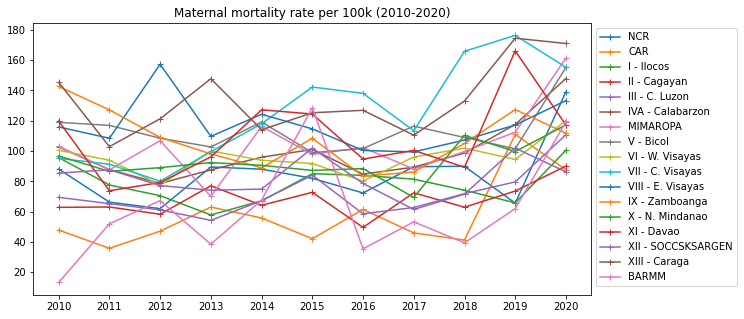

In [21]:
plt.figure(figsize=(10,5))
for i in df_maternal_rate['Region'].unique():
    df = df_maternal_rate[df_maternal_rate['Region'] == i]
    plt.plot(df['year'], df['maternal_death_rate_per100k'],'+-', label=i)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2021))
plt.title('Maternal mortality rate per 100k (2010-2020)');

In [22]:
data = df_maternal_rate.groupby('Region')['maternal_death_rate_per100k'].agg(list)

# Simple Exponential Smoothing

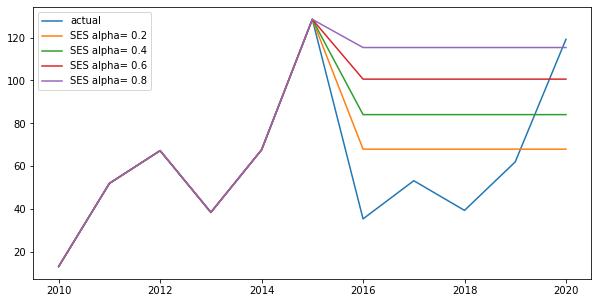

In [23]:
alpha_levels = [0.2, 0.4, 0.6, 0.8]
forecast_list = []
for a in alpha_levels:
    x = data[0][:6]
    model = SimpleExpSmoothing(x).fit(smoothing_level=a) # use SimpleExpSmoothing if you want to set alpha manually
    forecast = model.forecast(5)
    forecast_list.append(forecast)
plt.figure(figsize=(10,5))
plt.plot(np.arange(2010,2021),  data[0][:11], label='actual')
for i in range(len(alpha_levels)):
    y = np.concatenate([x, forecast_list[i]])
    plt.plot(np.arange(2010,2021), y, label='SES alpha= '+str(alpha_levels[i]))
plt.legend()

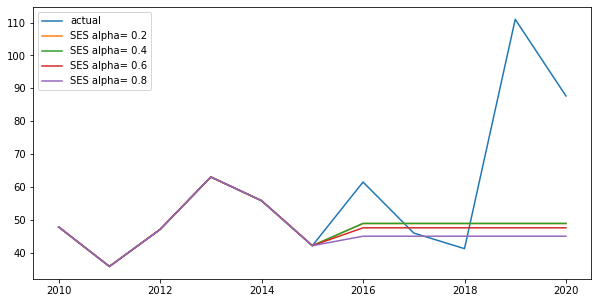

In [24]:
alpha_levels = [0.2, 0.4, 0.6, 0.8]
forecast_list = []
for a in alpha_levels:
    x = data[1][:6]
    model = SimpleExpSmoothing(x).fit(smoothing_level=a) # use SimpleExpSmoothing if you want to set alpha manually
    forecast = model.forecast(5)
    forecast_list.append(forecast)
plt.figure(figsize=(10,5))
plt.plot(np.arange(2010,2021),  data[1][:11], label='actual')
for i in range(len(alpha_levels)):
    y = np.concatenate([x, forecast_list[i]])
    plt.plot(np.arange(2010,2021), y, label='SES alpha= '+str(alpha_levels[i]))
plt.legend()

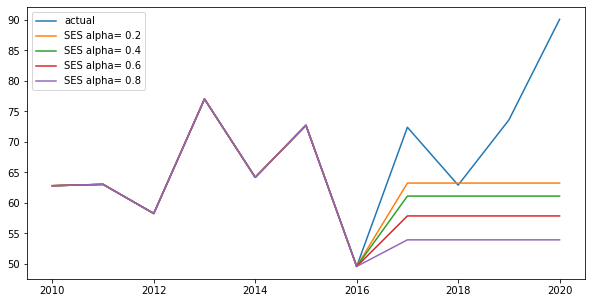

In [25]:
alpha_levels = [0.2, 0.4, 0.6, 0.8]
forecast_list = []
for a in alpha_levels:
    x = data[3][:7]
    model = SimpleExpSmoothing(x).fit(smoothing_level=a) # use SimpleExpSmoothing if you want to set alpha manually
    forecast = model.forecast(4)
    forecast_list.append(forecast)
    
plt.figure(figsize=(10,5))
plt.plot(np.arange(2010,2021),  data[3][:11], label='actual')
for i in range(len(alpha_levels)):
    y = np.concatenate([x, forecast_list[i]])
    plt.plot(np.arange(2010,2021), y, label='SES alpha= '+str(alpha_levels[i]))
plt.legend()

In [26]:
df = df_maternal_rate[(df_maternal_rate['Region'] == 'NCR') &
                 (df_maternal_rate.year < 2021)][['year','maternal_death_rate_per100k']]
df.year = df.year.astype(int)
df.set_index('year', inplace=True)

/home/msds2022/jjayme/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/msds2022/jjayme/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


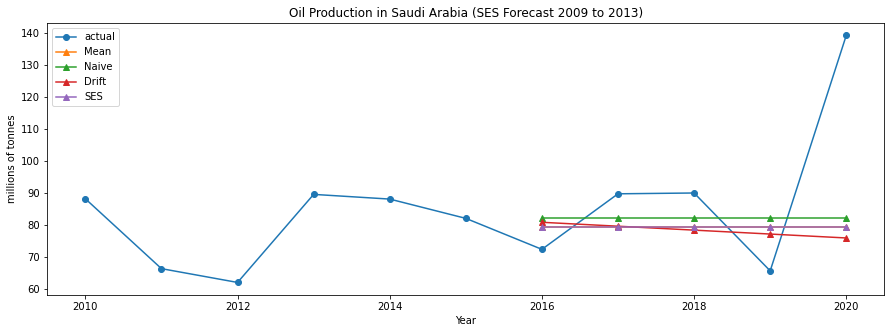

,MAE,RMSE,MAPE,MASE,RMSSE
Naive,19.7896,27.4243,19.3871,1.6168,2.2406
"SES(a=0.00, l_0=79.30)",20.3260,28.4508,19.4072,1.6606,2.3244
Mean,20.3260,28.4508,19.4072,1.6606,2.3244
Drift,21.0149,29.8519,19.7975,1.7169,2.4389


In [27]:
# Train-Test split
test_size = 5
df_train = df.iloc[:-test_size]
df_test = df.iloc[-test_size:]

# Forecast
h = test_size
df_f = pd.DataFrame()
df_f['Mean'] = meanf(df_train.to_numpy(), h=h)
df_f['Naive'] = naivef(df_train.to_numpy(), h=h)
df_f['Drift'] = driftf(df_train.to_numpy(), h=h)

model = SimpleExpSmoothing(df_train).fit(optimized=True)
df_f[f'SES(a={model.params["smoothing_level"]:.2f}, l_0={model.params["initial_level"]:.2f})'] = model.forecast(h).to_numpy()

df_f['year'] = np.arange(2016,2021)
df_f.set_index('year', inplace=True)

# Plot
plt.figure(figsize=(15,5))
plt.plot(df.index, df['maternal_death_rate_per100k'], 'o-', label='actual')
plt.plot(df_f.index, df_f['Mean'], '^-', label='Mean')
plt.plot(df_f.index, df_f['Naive'], '^-', label='Naive')
plt.plot(df_f.index, df_f['Drift'], '^-', label='Drift')
plt.plot(df_f.index, df_f[df_f.columns[-1]], '^-', label='SES')
plt.legend()

# df_f.plot(ax=ax, style='o:')
plt.title('Oil Production in Saudi Arabia (SES Forecast 2009 to 2013)')
plt.xlabel('Year')
plt.ylabel('millions of tonnes')
plt.legend()
plt.autoscale()
plt.show()

# Evaluation metrics
def eval_metrics(df_f, df_train, df_test, sortby='MAE'):
    """
    Helper function for calculating metrics. Only works for univariate time series. 
    
    Note that MASE/RMSSE are the non-seasonal versions.
    
    Exercise: Make a cross-validation wrapper. Make a multi-target wrapper.
    """
    acc = {'MAE': [], 'RMSE': [], 'MAPE': [], 'MASE': [], 'RMSSE': []}
    
    y_true = df_test.to_numpy().flatten()
    ts_train = df_train.to_numpy().flatten()
    
    for col in df_f:
        y_pred = df_f[col].to_numpy().flatten()
        acc['MAE'].append(mae(y_true, y_pred))
        acc['RMSE'].append(rmse(y_true, y_pred))
        acc['MAPE'].append(mape(y_true, y_pred)*100)
        acc['MASE'].append(mase(y_true, y_pred, ts_train))
        acc['RMSSE'].append(rmsse(y_true, y_pred, ts_train))
    
    df_acc = pd.DataFrame.from_dict(acc)
    df_acc.index = df_f.columns
    
    return df_acc.sort_values(sortby)

eval_metrics(df_f, df_train, df_test).round(4)

In [28]:
forecast_list = []
mean_list = []
for i in data:
    series = i[:11]
    model = SimpleExpSmoothing(series).fit(optimized=True)
    y = model.forecast(10)
    forecast_ses = np.concatenate([series, y])
    mean_value = np.mean(series)
    forecast_mean = [mean_value]*10
    
    forecast_list.append(np.concatenate([series, forecast_mean]))
    mean_list.append(np.concatenate([series, forecast_mean]))

In [29]:
df = pd.DataFrame()
df['year'] = np.arange(2010, 2031)
for i, region in zip(forecast_list, data.index):
    df[region] = i

In [30]:
df_maternal_death_rate = df.melt(id_vars='year', value_vars=data.index)
df_maternal_death_rate.columns = ['year', 'Region', 
                                  'maternal_death_rate_per100k']

In [31]:
df_maternal_death_rate

,year,Region,maternal_death_rate_per100k
0,2010,BARMM,13.211785
1,2011,BARMM,51.981806
2,2012,BARMM,67.254521
3,2013,BARMM,38.449708
4,2014,BARMM,67.645268
...,...,...,...
352,2026,XIII - Caraga,133.876048
353,2027,XIII - Caraga,133.876048
354,2028,XIII - Caraga,133.876048
355,2029,XIII - Caraga,133.876048


In [32]:
labels = ['NCR', 'CAR', 'I - Ilocos', 'II - Cagayan', 'III - C. Luzon',
       'IVA - Calabarzon', 'MIMAROPA', 'V - Bicol', 'VI - W. Visayas',
       'VII - C. Visayas', 'VIII - E. Visayas', 'IX - Zamboanga',
       'X - N. Mindanao', 'XI - Davao', 'XII - SOCCSKSARGEN',
       'XIII - Caraga', 'BARMM']

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

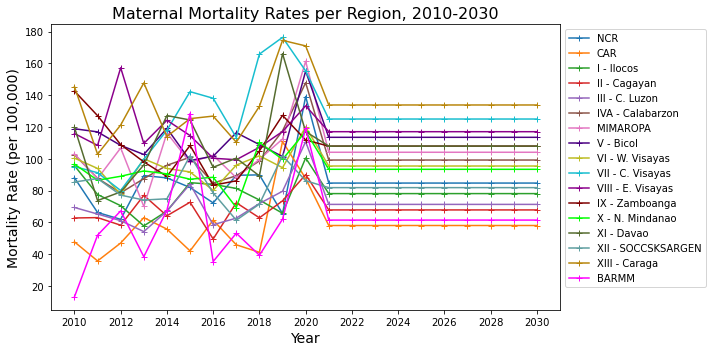

In [33]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_maternal_death_rate[df_maternal_death_rate['Region'] == j]
    plt.plot(df['year'], df['maternal_death_rate_per100k'],'+-', label=j,
            color=colors[i])
    
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
plt.title('Maternal Mortality Rates per Region, 2010-2030', fontsize=16)
plt.ylabel('Mortality Rate (per 100,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('maternal_mortality.png', dpi=300);

In [34]:
df_maternal_death_rate[df_maternal_death_rate['year'] == 2020].sort_values(by='maternal_death_rate_per100k')

,year,Region,maternal_death_rate_per100k
325,2020,XII - SOCCSKSARGEN,86.212795
31,2020,CAR,87.655780
73,2020,II - Cagayan,90.079270
52,2020,I - Ilocos,100.542362
94,2020,III - C. Luzon,110.799931
136,2020,IX - Zamboanga,111.826630
304,2020,XI - Davao,117.093005
283,2020,X - N. Mindanao,117.282503
10,2020,BARMM,119.222947
220,2020,VI - W. Visayas,120.062303


In [35]:
df_maternal_death_rate[df_maternal_death_rate['year'] == 2030].sort_values(by='maternal_death_rate_per100k')

,year,Region,maternal_death_rate_per100k
41,2030,CAR,58.070590
20,2030,BARMM,61.480217
83,2030,II - Cagayan,67.870426
104,2030,III - C. Luzon,71.353281
62,2030,I - Ilocos,78.139829
335,2030,XII - SOCCSKSARGEN,81.893487
188,2030,NCR,84.766414
293,2030,X - N. Mindanao,93.412510
230,2030,VI - W. Visayas,95.484174
125,2030,IVA - Calabarzon,99.251988


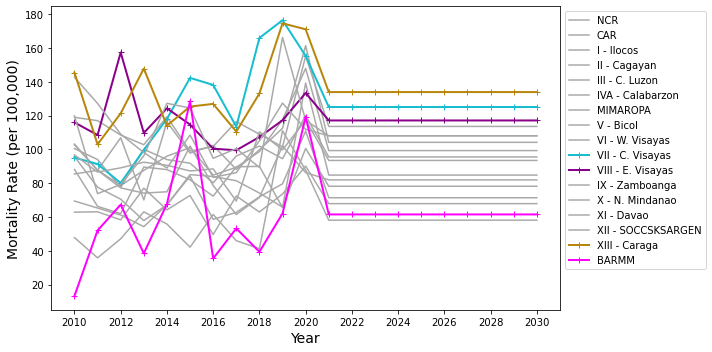

In [36]:
plt.figure(figsize=(10,5))
for i,j in enumerate(labels):
    df = df_maternal_death_rate[df_maternal_death_rate['Region'] == j]
    
    if j in ['BARMM','XIII - Caraga', 'VII - C. Visayas', 'VIII - E. Visayas' ]:
        plt.plot(df['year'], df['maternal_death_rate_per100k'],'+-', label=j,
                color=colors[i], lw=2)
    else:
    
        plt.plot(df['year'], df['maternal_death_rate_per100k'],
                 label=j, color='darkgrey')
        
    
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(np.arange(2010,2031,2))
# plt.title('Maternal Mortality Rates per Region, 2010-2030', fontsize=16)
plt.ylabel('Mortality Rate (per 100,000)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('PPT_maternal_mortality.png', dpi=300);

In [37]:
df_mat = df_maternal_death_rate[['year', 'Region', 'maternal_death_rate_per100k']]
df_mat.to_csv('~/cpt5/capstone/data/processed/maternal_rate_2010-2030.csv')